In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os
import joblib
import warnings
warnings.filterwarnings('ignore')

# base_dir = os.path.dirname(os.path.abspath(__file__))
# data_path = os.path.join(base_dir, '..', 'data', 'employee_data.csv')

df = pd.read_csv('employee_data.csv', nrows=5000)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Employee_ID                  5000 non-null   int64  
 1   Department                   5000 non-null   object 
 2   Gender                       5000 non-null   object 
 3   Age                          5000 non-null   int64  
 4   Job_Title                    5000 non-null   object 
 5   Hire_Date                    5000 non-null   object 
 6   Years_At_Company             5000 non-null   int64  
 7   Education_Level              5000 non-null   object 
 8   Performance_Score            5000 non-null   int64  
 9   Monthly_Salary               5000 non-null   float64
 10  Work_Hours_Per_Week          5000 non-null   int64  
 11  Projects_Handled             5000 non-null   int64  
 12  Overtime_Hours               5000 non-null   int64  
 13  Sick_Days         

In [43]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}:")
    print(df[col].unique())
    print("-" * 40)


Department:
['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']
----------------------------------------
Gender:
['Male' 'Female' 'Other']
----------------------------------------
Job_Title:
['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
----------------------------------------
Hire_Date:
['2022-01-19 08:03:05.556036' '2024-04-18 08:03:05.556036'
 '2015-10-26 08:03:05.556036' ... '2017-05-10 08:03:05.556036'
 '2018-06-09 08:03:05.556036' '2020-03-14 08:03:05.556036']
----------------------------------------
Education_Level:
['High School' 'Bachelor' 'Master' 'PhD']
----------------------------------------


In [44]:
df.isnull().sum()

,0
Employee_ID,0
Department,0
Gender,0
Age,0
Job_Title,0
Hire_Date,0
Years_At_Company,0
Education_Level,0
Performance_Score,0
Monthly_Salary,0


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.shape

(5000, 20)

In [47]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,40.866600,4.5076,2.999600,6405.500000,45.103600,24.342600,14.314400,6.971200,50.260000,9.992200,49.197800,0.996600,2.975976
std,1443.520003,11.091466,2.8452,1.405559,1379.728046,8.939242,14.236845,8.650117,4.352213,35.280042,5.451796,28.838644,0.819953,1.144295
min,1.000000,22.000000,0.0000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1250.750000,31.000000,2.0000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,1.997500
50%,2500.500000,41.000000,4.0000,3.000000,6500.000000,45.000000,24.000000,14.000000,7.000000,50.000000,10.000000,48.000000,1.000000,2.965000
75%,3750.250000,50.000000,7.0000,4.000000,7500.000000,53.000000,36.250000,22.000000,11.000000,75.000000,15.000000,74.000000,2.000000,3.960000
max,5000.000000,60.000000,9.0000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [48]:
numerical_df = pd.get_dummies(df)
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                                      Employee_ID       Age  Years_At_Company  \
Employee_ID                              1.000000  0.001372         -0.017022   
Age                                      0.001372  1.000000          0.008263   
Years_At_Company                        -0.017022  0.008263          1.000000   
Performance_Score                        0.035315  0.002255         -0.009053   
Monthly_Salary                           0.013319  0.006168         -0.019525   
...                                           ...       ...               ...   
Hire_Date_2024-09-03 08:03:05.556036    -0.014372 -0.023208         -0.031695   
Education_Level_Bachelor                 0.003840  0.014481         -0.003288   
Education_Level_High School             -0.004361 -0.008166          0.000695   
Education_Level_Master                  -0.004295 -0.008618          0.006670   
Education_Level_PhD                      0.007265 -0.001894         -0.004742   

                           

Data Visualization

Text(0, 0.5, 'Frequency')

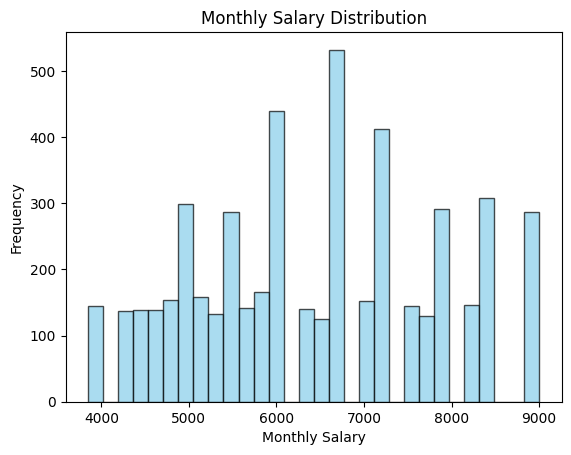

In [49]:
# 1. Target distribution
plt.subplot(1, 1, 1)
plt.hist(df['Monthly_Salary'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Monthly Salary Distribution')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')



Text(0.5, 1.0, 'Correlation Heatmap')

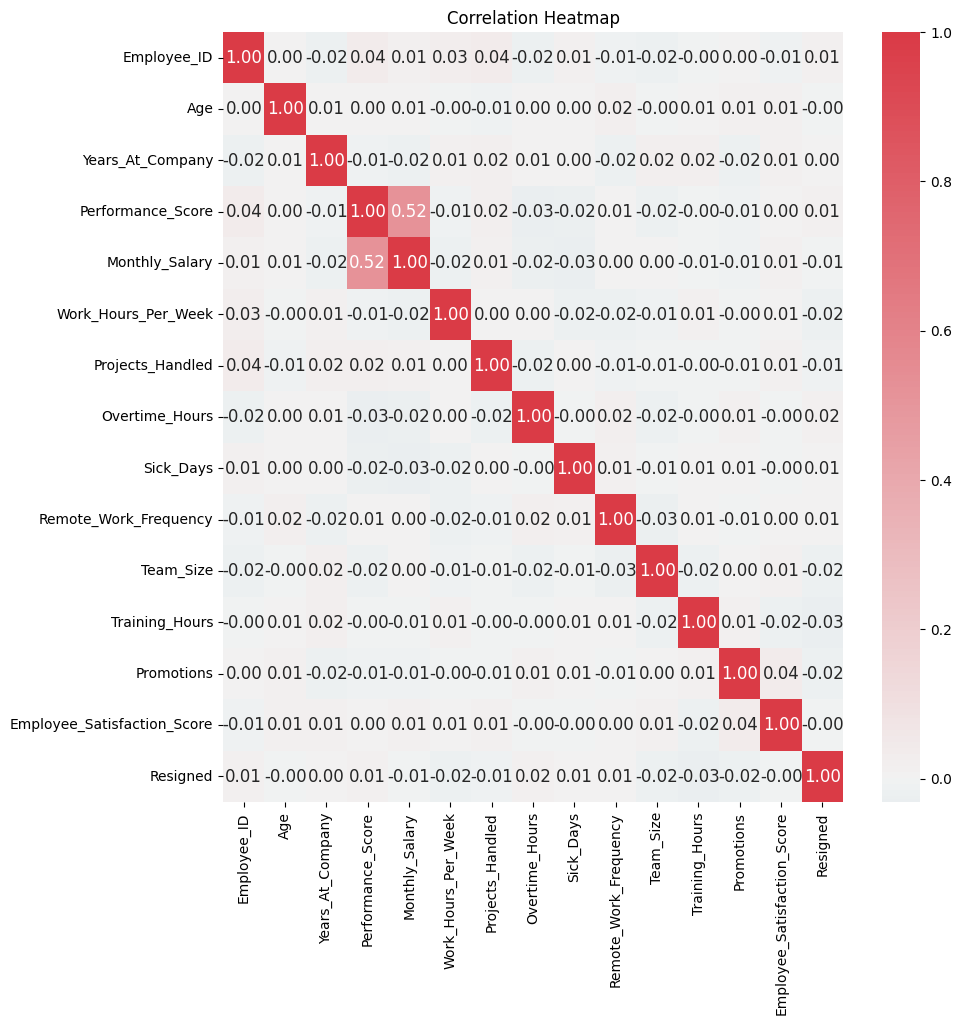

In [50]:
# Correlation heatmap

corr_matrix = df.select_dtypes(include=['number', 'bool']).corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", center = 0, annot_kws={"size": 12}).set_title('Correlation Heatmap')

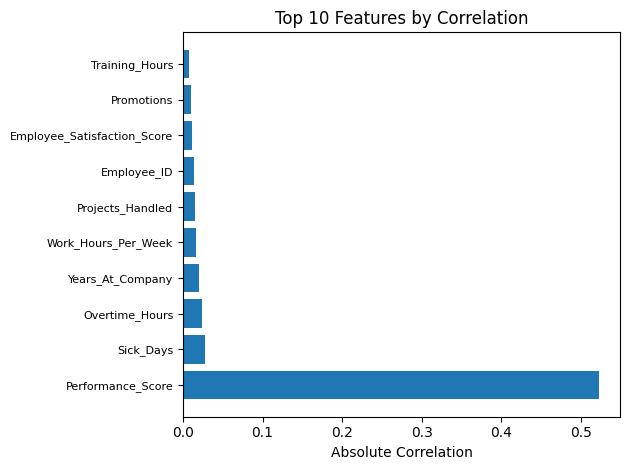

In [51]:
plt.subplot(1, 1, 1)
target_corr = corr_matrix['Monthly_Salary'].abs().sort_values(ascending=False)[1:11]
plt.barh(range(len(target_corr)), target_corr.values)
plt.yticks(range(len(target_corr)), target_corr.index, fontsize=8)
plt.xlabel('Absolute Correlation')
plt.title('Top 10 Features by Correlation')

plt.tight_layout()
plt.show()

## Feature Engineering

In [52]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [53]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [54]:
# Make a copy to avoid modifying original
df_processed = df.copy()

# Convert Hire_Date to numeric features
df_processed['Hire_Year'] = pd.to_datetime(df_processed['Hire_Date']).dt.year
df_processed['Hire_Month'] = pd.to_datetime(df_processed['Hire_Date']).dt.month
df_processed.drop('Hire_Date', axis=1, inplace=True)

# Set target variable and remove it from the features
target = 'Monthly_Salary'
y = df_processed[target]
X = df_processed.drop([target, 'Employee_ID'], axis=1)


#Define selected features BEFORE encoding
selected_features =["Job_Title","Education_Level","Sick_Days", "Overtime_Hours",
"Team_Size","Age","Work_Hours_Per_Week","Promotions","Projects_Handled"] # remove perfomance score since it might be influences by salary



# Select only the features you want to use
X_selected = X[selected_features]

# Convert categorical variables to dummy variables
X_encoded = pd.get_dummies(X_selected, drop_first=True)

## Split data to train and test

In [55]:
print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
)


Splitting data into train and test sets...


## Train and Compare Models

In [56]:
# Define models with hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}

print("\nTraining and evaluating models...")
print("-" * 50)

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate scores
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'r2_score': r2,
        'mse': mse
    }

    # Print results
    print(f"{name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    print()

# Find the best model (highest R² score)
best_model_name = max(results.keys(), key=lambda x: results[x]['r2_score'])
best_model = results[best_model_name]['model']
best_r2 = results[best_model_name]['r2_score']

print("=" * 50)
print(f"BEST MODEL: {best_model_name}")
print(f"Best R² Score: {best_r2:.4f}")
print("=" * 50)

# Save the best model
model_filename = f'best_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Best model saved as: {model_filename}")

# Save the feature names for future use (these will be the encoded feature names)
feature_names = X_encoded.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Feature names saved as: feature_names.pkl")
print(f"Total features after encoding: {len(feature_names)}")
print("Feature names:", feature_names)


Training and evaluating models...
--------------------------------------------------
Linear Regression:
  R² Score: 0.7432
  MSE: 510281.2047

Decision Tree:
  R² Score: 0.4865
  MSE: 1020390.0000

Random Forest:
  R² Score: 0.7346
  MSE: 527358.9705

BEST MODEL: Linear Regression
Best R² Score: 0.7432
Best model saved as: best_model.pkl
Feature names saved as: feature_names.pkl
Total features after encoding: 16
Feature names: ['Sick_Days', 'Overtime_Hours', 'Team_Size', 'Age', 'Work_Hours_Per_Week', 'Promotions', 'Projects_Handled', 'Job_Title_Consultant', 'Job_Title_Developer', 'Job_Title_Engineer', 'Job_Title_Manager', 'Job_Title_Specialist', 'Job_Title_Technician', 'Education_Level_High School', 'Education_Level_Master', 'Education_Level_PhD']


In [57]:
point_index = 0
"""
Make prediction on one single row from test data
"""
print(f"\nPREDICTING ON SINGLE DATA POINT (Row {point_index}):")
print("=" * 50)

# Get the single data point
single_point = X_test.iloc[point_index:point_index+1]
actual_value = y_test.iloc[point_index]

print("Input features for this data point:")
for feature, value in single_point.iloc[0].items():
    if value != 0:
        print(f"  {feature}: {value}")


print(f"\nActual salary: {actual_value:.2f}")
print("\nPredictions from each model:")
print("-" * 30)

for name, result in results.items():
    model = result['model']
    prediction = model.predict(single_point)[0]
    error = abs(prediction - actual_value)

    print(f"{name}:")
    print(f"  Predicted: {prediction:.2f}")
    print(f"Actual: {actual_value}")
    print(f"  Error: {error:.2f}")
    print()


PREDICTING ON SINGLE DATA POINT (Row 0):
Input features for this data point:
  Sick_Days: 3
  Overtime_Hours: 19
  Team_Size: 10
  Age: 32
  Work_Hours_Per_Week: 58
  Promotions: 1
  Projects_Handled: 42
  Education_Level_PhD: True

Actual salary: 5200.00

Predictions from each model:
------------------------------
Linear Regression:
  Predicted: 5246.27
Actual: 5200.0
  Error: 46.27

Decision Tree:
  Predicted: 4400.00
Actual: 5200.0
  Error: 800.00

Random Forest:
  Predicted: 5180.00
Actual: 5200.0
  Error: 20.00



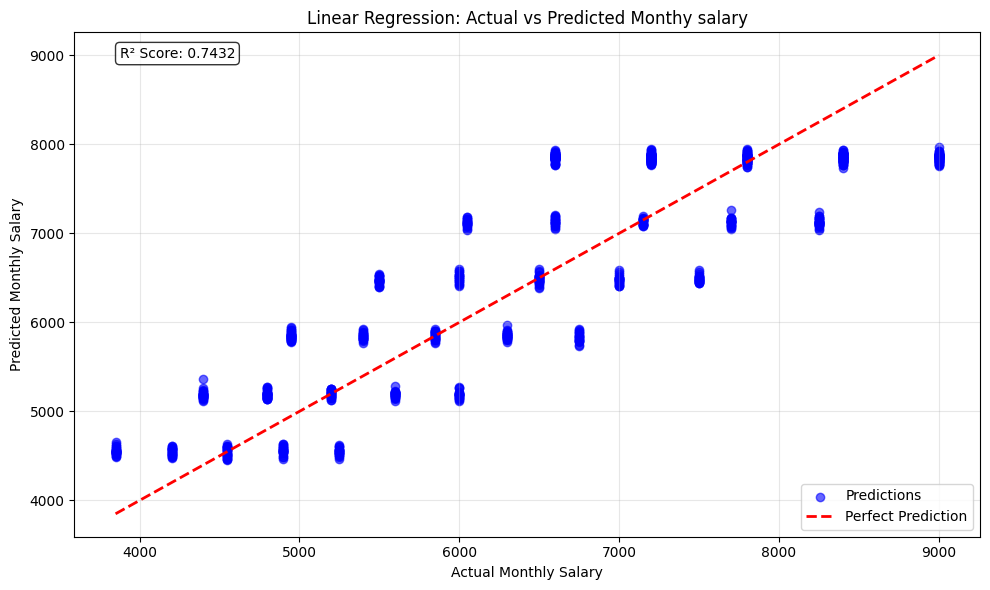

Linear Regression R² Score: 0.7432
The closer the points are to the red line, the better the predictions!


In [58]:
"""
Draw scatter plot showing the linear regression line
"""
import matplotlib.pyplot as plt
import numpy as np

# Get the linear regression model
lr_predictions = best_model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot actual vs predicted points
plt.scatter(y_test, lr_predictions, alpha=0.6, color='blue', label='Predictions')

# Draw the perfect prediction line (diagonal)
min_val = min(y_test.min(), lr_predictions.min())
max_val = max(y_test.max(), lr_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Monthly Salary')
plt.ylabel('Predicted Monthly Salary')
plt.title('Linear Regression: Actual vs Predicted Monthy salary')
plt.legend()
plt.grid(True, alpha=0.3)

# Add R² score on the plot
r2 = results['Linear Regression']['r2_score']
plt.text(0.05, 0.95, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes,
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Linear Regression R² Score: {r2:.4f}")
print("The closer the points are to the red line, the better the predictions!")